In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [4]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target
X = cancer_data.data
X = preprocessing.scale(X)

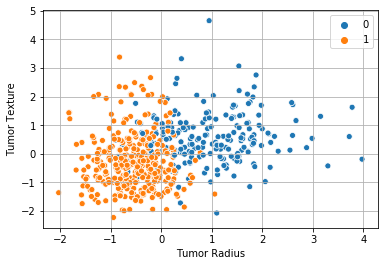

In [5]:
sns.scatterplot(X[:,0], X[:,1], hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [7]:
alpha = np.arange(1e-15, 1, 0.005)
val_scores = np.zeros((len(alpha), 1))
for i in range(len(alpha)):
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean()

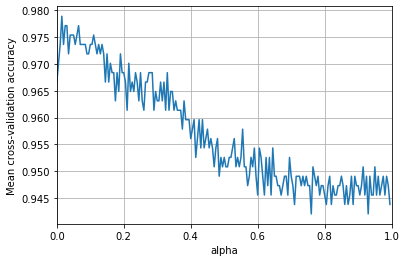

In [8]:
plt.plot(alpha, val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.grid(True)
plt.show()

alpha_star = 0.015000000000000999


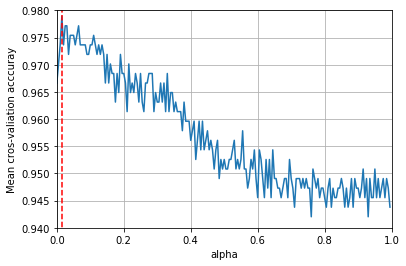

In [9]:
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.plot(alpha, val_scores)
plt.plot(np.ones(11)*alpha_star, np.arange(0,1.1,0.1), '--r')
plt.xlim(0,1)
plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean cros-valiation acccuray')
plt.grid(True)
plt.show()

In [10]:
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(X,y)
print('Training accuracy =', model_trained.score(X,y))

Training accuracy = 0.984182776801406


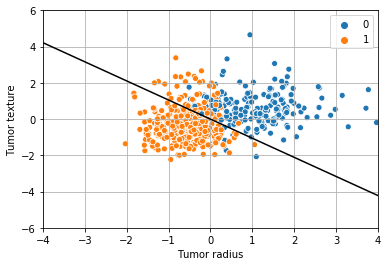

In [11]:
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
x1 = np.arange(-10,10,0.5)
y1 = slope * x1
sns.scatterplot(X[:,0], X[:,1], hue=y)
plt.plot(x1, y1, '-k')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor radius')
plt.ylabel('Tumor texture')
plt.grid(True)
plt.show()